In [2]:
pip install opencv-python==3.4.4.19

Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
print(cv2.__version__)

3.4.4


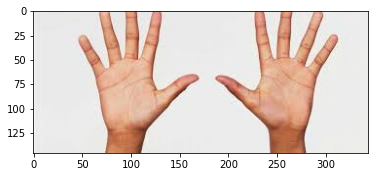

In [4]:
image = cv2.imread('palm.jfif')


image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image)

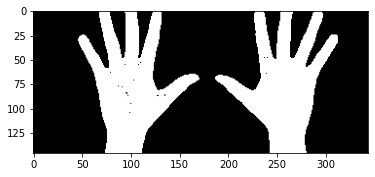

In [5]:
gray = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)


retval,binary = cv2.threshold(gray, 210,225, cv2.THRESH_BINARY_INV)
plt.imshow(binary, cmap='gray')

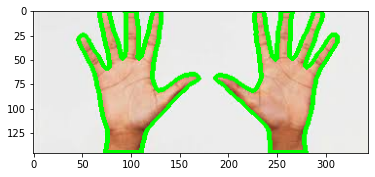

In [6]:

cnts = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours = cnts[0] if len(cnts) == 2 else cnts[1]

contours_image = np.copy(image)
contours_image = cv2.drawContours(contours_image, contours, -1, (0,255,0), 3)

plt.imshow(contours_image)

Angles of each contour (in degrees): [6.539806365966797, 171.48907470703125]


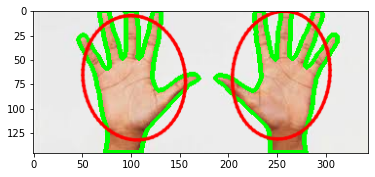

In [7]:
def orientations(image,contours):

    angles = []

    
    for contour in contours:
        ellipse = cv2.fitEllipse(contour)
        (x,y), (MA,ma), angle = ellipse
        cv2.ellipse(image, ellipse, (255,0,0), 2,cv2.LINE_AA)
        angles.append(angle)
    
    plt.imshow(image)
    return angles

angles = orientations(contours_image,contours)
print('Angles of each contour (in degrees): ' + str(angles))

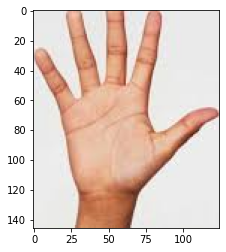

In [8]:
def left_hand_crop(image, selected_contour):
    
    
    x,y,w,h = cv2.boundingRect(selected_contour)
    cropped_image = np.copy(image)
    cropped_image = cropped_image[y: y + h, x: x + w]
    
    return cropped_image

selected_contour = contours[1]
if(selected_contour is not None):
    cropped_image = left_hand_crop(image, selected_contour)
    plt.imshow(cropped_image)